In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



In [2]:
ufc_df = pd.read_csv('ufc-master.csv')
ufc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6188 entries, 0 to 6187
Columns: 118 entries, RedFighter to BKOOdds
dtypes: bool(1), float64(60), int64(43), object(14)
memory usage: 5.5+ MB


In [3]:
ufc_df.head()

,RedFighter,BlueFighter,RedOdds,BlueOdds,RedExpectedValue,BlueExpectedValue,Date,Location,Country,Winner,...,FinishDetails,FinishRound,FinishRoundTime,TotalFightTimeSecs,RedDecOdds,BlueDecOdds,RSubOdds,BSubOdds,RKOOdds,BKOOdds
0,Alex Pereira,Jamahal Hill,-130.0,110.0,76.9231,110.0000,2024-04-13,"Las Vegas, Nevada, USA",USA,Red,...,Punch,1.0,3:14,194.0,600.0,650.0,2000.0,1400.0,110.0,200.0
1,Zhang Weili,Yan Xiaonan,-455.0,350.0,21.9780,350.0000,2024-04-13,"Las Vegas, Nevada, USA",USA,Red,...,NaN,5.0,5:00,1500.0,200.0,NaN,400.0,NaN,140.0,NaN
2,Justin Gaethje,Max Holloway,-185.0,154.0,54.0541,154.0000,2024-04-13,"Las Vegas, Nevada, USA",USA,Blue,...,Punch,5.0,4:59,1499.0,300.0,250.0,2200.0,1600.0,150.0,550.0
3,Charles Oliveira,Arman Tsarukyan,190.0,-218.0,190.0000,45.8716,2024-04-13,"Las Vegas, Nevada, USA",USA,Blue,...,NaN,3.0,5:00,900.0,900.0,330.0,450.0,700.0,550.0,130.0
4,Bo Nickal,Cody Brundage,-1600.0,900.0,6.2500,900.0000,2024-04-13,"Las Vegas, Nevada, USA",USA,Red,...,Rear Naked Choke,2.0,3:38,518.0,1000.0,3000.0,-135.0,3000.0,150.0,1400.0


In [4]:
# Checking for missing values in each column to identify columns requiring cleaning
missing_values = ufc_df.isnull().sum().sort_values(ascending=False)
missing_values[missing_values > 0]

BWFeatherweightRank      6187
RWFeatherweightRank      6179
BPFPRank                 6126
BWFlyweightRank          6122
RWFlyweightRank          6099
BWStrawweightRank        6096
BWBantamweightRank       6086
BBantamweightRank        6076
BWelterweightRank        6075
BLightHeavyweightRank    6073
BLightweightRank         6073
BFeatherweightRank       6070
BFlyweightRank           6068
BMiddleweightRank        6060
RWStrawweightRank        6052
BHeavyweightRank         6049
RWBantamweightRank       6041
RFeatherweightRank       6019
RLightHeavyweightRank    6016
RMiddleweightRank        6016
RBantamweightRank        6013
RHeavyweightRank         6012
RFlyweightRank           6012
RLightweightRank         6009
RWelterweightRank        6008
RPFPRank                 5953
BMatchWCRank             5058
RMatchWCRank             4504
FinishDetails            3433
BKOOdds                  1257
BSubOdds                 1256
RSubOdds                 1225
RKOOdds                  1223
EmptyArena

## Data Cleaning

In [5]:
# Dropping columns with a high percentage of missing values that are not essential for the analysis
columns_to_drop = ['BWFeatherweightRank', 'RWFeatherweightRank', 'BPFPRank', 'BWFlyweightRank', 'RWFlyweightRank',
                   'BWStrawweightRank', 'BWBantamweightRank', 'BBantamweightRank', 'BWelterweightRank',
                   'BLightHeavyweightRank', 'BLightweightRank', 'BFeatherweightRank', 'BFlyweightRank',
                   'BMiddleweightRank', 'RWStrawweightRank', 'BHeavyweightRank', 'RWBantamweightRank', 'RFeatherweightRank',
                   'RLightHeavyweightRank', 'RMiddleweightRank', 'RBantamweightRank', 'RHeavyweightRank', 'RFlyweightRank',
                   'RLightweightRank', 'RWelterweightRank', 'RPFPRank', 'BMatchWCRank', 'RMatchWCRank', 'FinishDetails']

ufc_df = ufc_df.drop(columns=columns_to_drop)

# Dropping rows with missing values in essential columns for analysis
ufc_df = ufc_df.dropna(subset=['RedOdds', 'BlueOdds', 'TotalFightTimeSecs', 'RedAvgSigStrLanded', 'BlueAvgSigStrLanded',
                               'RedAvgTDLanded', 'BlueAvgTDLanded', 'RedAvgSubAtt', 'BlueAvgSubAtt', 'RedAvgSigStrPct',
                               'BlueAvgSigStrPct', 'RedAvgTDPct', 'BlueAvgTDPct', 'Winner', 'WeightClass'])

# Creating calculated fields
ufc_df['RedExperience'] = ufc_df['RedAvgSigStrLanded'] + ufc_df['RedAvgTDLanded'] + ufc_df['RedAvgSubAtt']
ufc_df['BlueExperience'] = ufc_df['BlueAvgSigStrLanded'] + ufc_df['BlueAvgTDLanded'] + ufc_df['BlueAvgSubAtt']
ufc_df['RedTotalAccuracy'] = (ufc_df['RedAvgSigStrPct'] + ufc_df['RedAvgTDPct']) / 2
ufc_df['BlueTotalAccuracy'] = (ufc_df['BlueAvgSigStrPct'] + ufc_df['BlueAvgTDPct']) / 2

# Verifying the cleaned data
ufc_df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 4462 entries, 0 to 6187
Data columns (total 93 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   RedFighter                   4462 non-null   object 
 1   BlueFighter                  4462 non-null   object 
 2   RedOdds                      4462 non-null   float64
 3   BlueOdds                     4462 non-null   float64
 4   RedExpectedValue             4462 non-null   float64
 5   BlueExpectedValue            4462 non-null   float64
 6   Date                         4462 non-null   object 
 7   Location                     4462 non-null   object 
 8   Country                      4462 non-null   object 
 9   Winner                       4462 non-null   object 
 10  TitleBout                    4462 non-null   bool   
 11  WeightClass                  4462 non-null   object 
 12  Gender                       4462 non-null   object 
 13  NumberOfRounds         

## Data Visualizations

### Win Rate by Weight Class

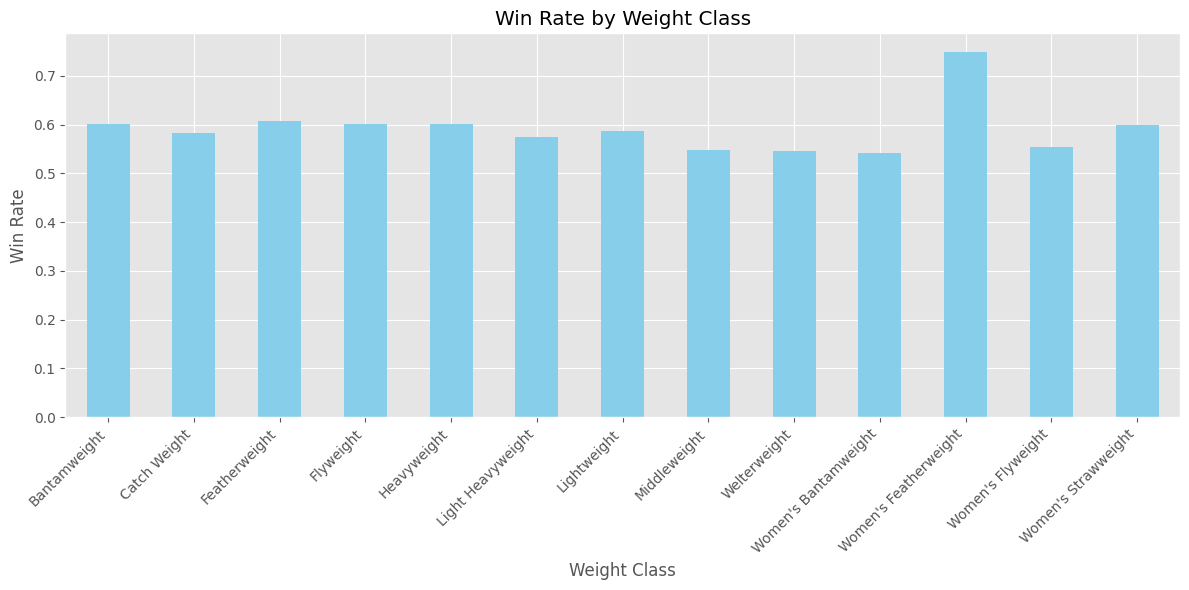

In [12]:
weight_class_win_rate = ufc_df.groupby('WeightClass')['Winner'].apply(lambda x: (x == 'Red').mean())
# Plotting win rate by weight class
plt.figure(figsize=(12, 6))
weight_class_win_rate.plot(kind='bar', color='skyblue')
plt.title('Win Rate by Weight Class')
plt.xlabel('Weight Class')
plt.ylabel('Win Rate')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

This bar chart displays the win rate for each weight class, indicating which categories have higher or lower winning percentages. Certain weight classes might showcase different dynamics, like endurance and strength, which could impact win likelihood.

### Effect of Strike Accuracy on Winning

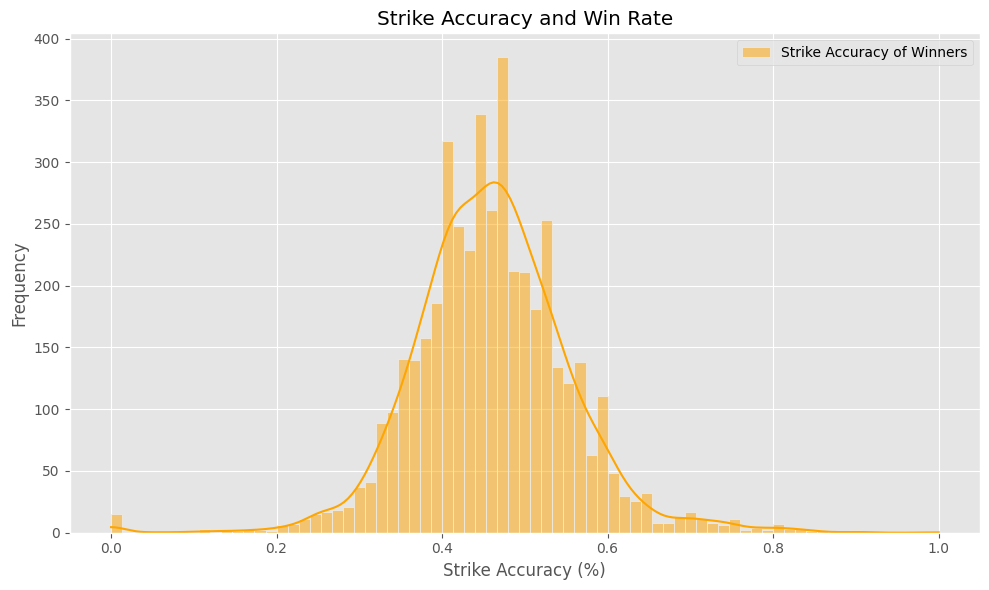

In [13]:
plt.figure(figsize=(10, 6))
sns.histplot(ufc_df, x='RedAvgSigStrPct', kde=True, color='orange', label='Strike Accuracy of Winners')
plt.title('Strike Accuracy and Win Rate')
plt.xlabel('Strike Accuracy (%)')
plt.ylabel('Frequency')
plt.legend()
plt.tight_layout()
plt.show()


The histogram shows the distribution of winners based on their strike accuracy, suggesting that higher accuracy generally correlates with winning outcomes. This finding emphasizes the importance of landing precise strikes in UFC success.

### Takedown Accuracy and Win Rate

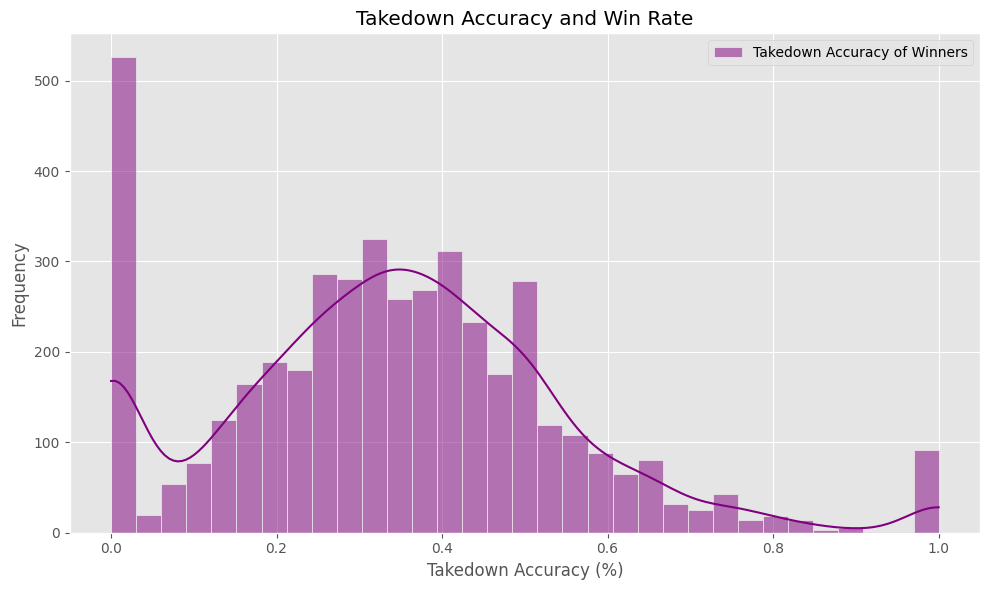

In [14]:
plt.figure(figsize=(10, 6))
sns.histplot(ufc_df, x='RedAvgTDPct', kde=True, color='purple', label='Takedown Accuracy of Winners')
plt.title('Takedown Accuracy and Win Rate')
plt.xlabel('Takedown Accuracy (%)')
plt.ylabel('Frequency')
plt.legend()
plt.tight_layout()
plt.show()

This histogram reveals the winning distribution according to takedown accuracy, highlighting that fighters with greater takedown accuracy tend to win more often. This suggests that controlling opponents on the ground can provide a competitive edge.

### Fighting Style Distribution Among Winners

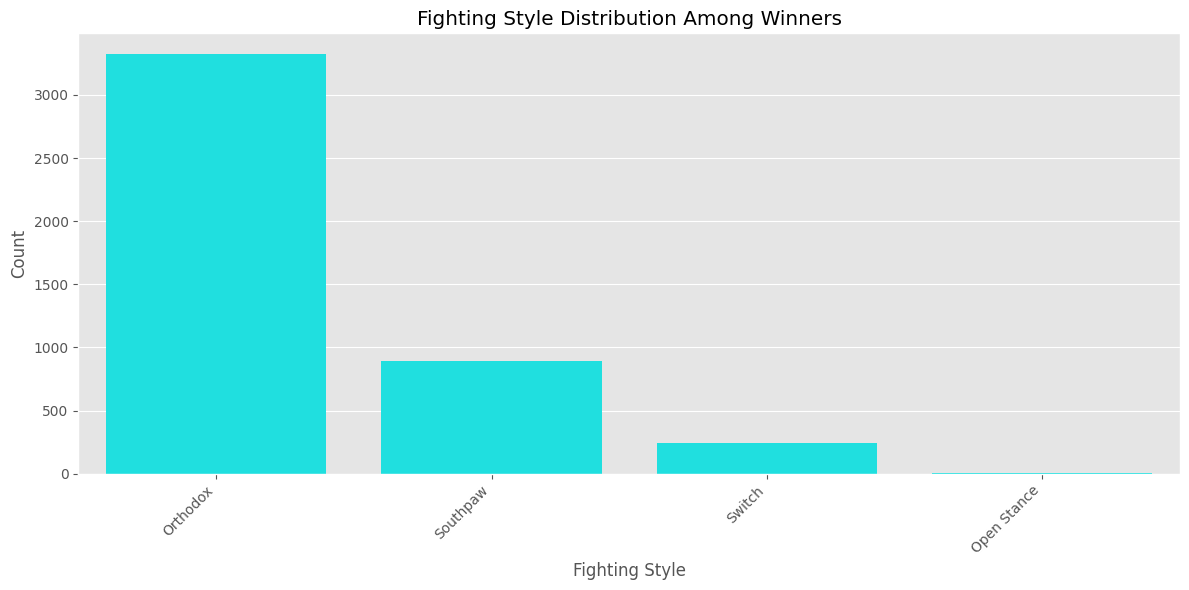

In [15]:
plt.figure(figsize=(12, 6))
sns.countplot(data=ufc_df, x='RedStance', color='cyan', order=ufc_df['RedStance'].value_counts().index)
plt.title('Fighting Style Distribution Among Winners')
plt.xlabel('Fighting Style')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

This bar chart shows the distribution of fighting styles (stances) among winners, with a focus on traditional stances like orthodox and southpaw. Popularity of certain stances among winners may suggest strategic advantages in fight tactics or defense mechanisms.

### Age and Win Rate

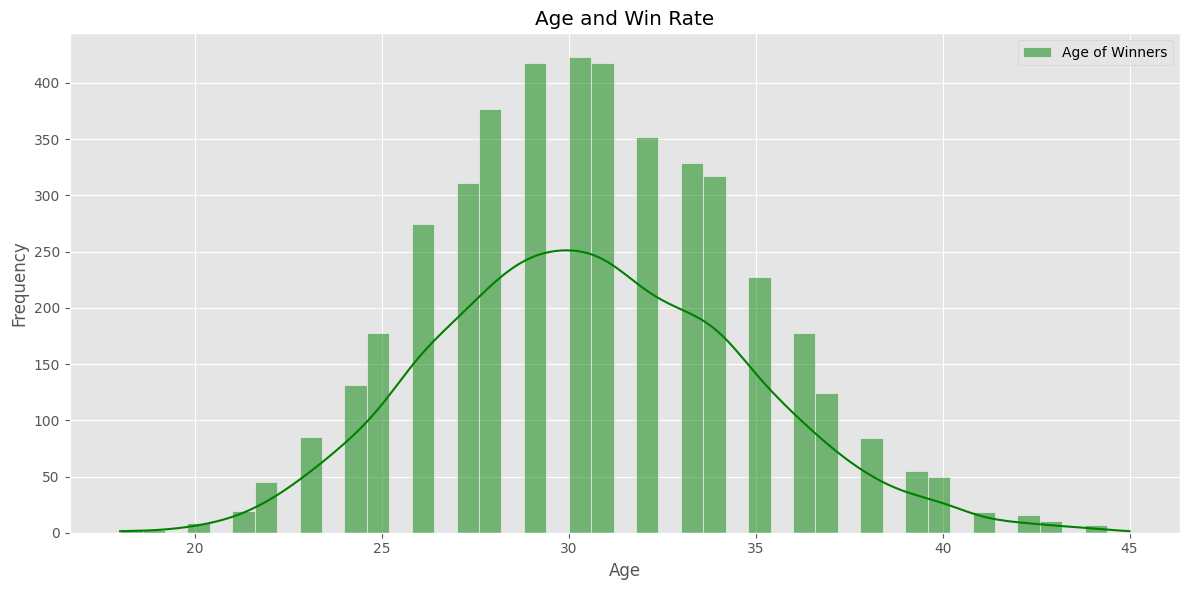

In [16]:
plt.figure(figsize=(12, 6))
sns.histplot(ufc_df['RedAge'], kde=True, color='green', label='Age of Winners')
plt.title('Age and Win Rate')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend()
plt.tight_layout()
plt.show()

The histogram illustrates the age distribution of winners, indicating whether younger or older fighters tend to win more frequently. Observing any peak in certain age ranges can provide insights into the potential advantage of experience and physical condition at different ages.